### The THD trend 

#### For different Amplitudes

taking the different amplitudes for 4 periods

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [34]:
fig_dir = r"C:\Users\Fabusuyi\Documents\Work _UCT\PG\Write_Up\figs\load_paper"
def save_figure(fname, obj, dir=fig_dir):
    """wrapper to save figure in desied directory"""
    path = os.path.join(os.path.normpath(fig_dir), fname)
    obj.savefig(path)

In [35]:
thd_col_names = ['freq', 'thd_v', 'thd_i']
dt_thd_1 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-45-30-thd-0.05-4.csv', names=thd_col_names)
dt_thd_2 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-54-50-thd-0.1-4.csv', names=thd_col_names)
dt_thd_3 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 12-04-14-thd-0.15-4.csv', names=thd_col_names)
dt_thd_4 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 12-13-34-thd-0.2-4.csv', names=thd_col_names)

dt_thd_1.head()
# dt_thd_1, dt_thd_2, dt_thd_3,dt_thd_4,dt_thd_5

,freq,thd_v,thd_i
0,0.1,2.3062,0.27850
1,1.0,5.3264,0.30062
2,5.0,1.9615,0.15031
3,12.0,2.6050,0.30697
4,20.0,1.2068,0.20530


In [36]:
dt_thd_1[dt_thd_1['freq'] == 300]['thd_i'].values[0]

0.10830999999999999

In [37]:
thd_s = [dt_thd_1, dt_thd_2, dt_thd_3,dt_thd_4]
ampl = [0.05,0.1,0.15,0.2]
thd_vals = []
for thd in thd_s:
    thd_val_pick = thd[thd['freq'] == 300]['thd_i'].values[0]
    thd_vals.append(thd_val_pick)
    
thd_vals

[0.10830999999999999,
 0.097298999999999997,
 0.10515999999999999,
 0.11509000000000001]

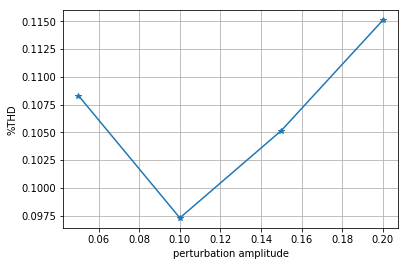

In [38]:
fig, ax = plt.subplots()
ax.plot(ampl, thd_vals, '-*')

#ax.set_title('THD plot for different amplitude')
ax.set_xlabel('perturbation amplitude')
ax.set_ylabel('%THD')
ax.grid(True)

In [39]:
fig.savefig('./figs/thd_ampl.png', bbox_inches='tight');
save_figure('thd_ampl.png', fig)

### Visualizing voltage and current data

Picking a for freq 300 and 0.1 and 4 for ampl and periods respectively.

In [40]:
volt_curr_names = [ 0.1, 1, 5, 12, 20, 80, 150, 300, 600, 1000, 1500, 2000]
dt_volt = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-54-50-volt-0.1-4.csv', names=volt_curr_names)
dt_curr = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-54-50-curr-0.1-4.csv', names=volt_curr_names)
dt_curr.head()

,0.1,1.0,5.0,12.0,20.0,80.0,150.0,300.0,600.0,1000.0,1500.0,2000.0
0,0.48904,0.48685,0.48998,0.49029,0.49092,0.48810,0.49154,0.49154,0.48904,0.48998,0.49248,0.48967
1,0.49373,0.49185,0.49248,0.49029,0.49217,0.49310,0.48967,0.48904,0.48967,0.48904,0.49342,0.48967
2,0.49310,0.49154,0.49342,0.48842,0.49060,0.49435,0.49185,0.48998,0.48998,0.48904,0.49342,0.48998
3,0.49123,0.49060,0.49404,0.49404,0.49467,0.48998,0.49310,0.49342,0.49060,0.48967,0.49342,0.49060
4,0.49498,0.49435,0.49435,0.49560,0.49279,0.49435,0.49185,0.49310,0.49217,0.49092,0.49217,0.49154


In [41]:
# series - time map/labelling
Fs = 2000 * 500;
time = (np.arange(0,2000)/Fs) * 1000  # time in milliseconds
time = np.round(time, 2)

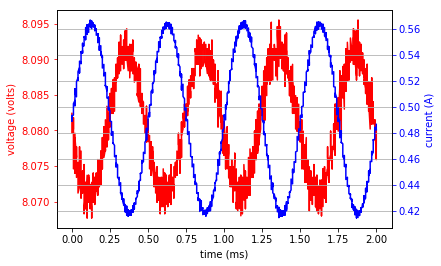

In [42]:
fig, ax = plt.subplots()
ax.plot(time, dt_volt[300],'r-')
ax.set_xlabel('time (ms)')
ax.set_ylabel('voltage (volts)', color='r')
ax.tick_params('y', colors='r')

ax2 = ax.twinx()
ax2.plot(time, dt_curr[300], 'b-')
ax2.set_ylabel('current (A)', color='b')
ax2.tick_params('y', colors='b')
plt.grid(True)

#ax.set_title('voltage and current for at 300Hz');

In [47]:
save_figure('volt_curr_2k.png', fig)

### Showing the Period Effect

Taking a 300 Hertz, 0.1 amplitude and all periods

In [48]:
names = [ 0.1, 1, 5, 12, 20, 80, 150, 300, 600, 1000, 1500, 2000]

dt_fft_1 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-51-44-curr_mag-0.1-2.csv', names=names)
dt_fft_2 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-54-50-curr_mag-0.1-4.csv', names=names)
dt_fft_3 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-58-20-curr_mag-0.1-6.csv', names=names)

In [49]:
# the frequency array fro each period
dt_f_arr_1 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-51-44-freq_array-0.1-2.csv', names=names)
dt_f_arr_2 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-54-50-freq_array-0.1-4.csv', names=names)
dt_f_arr_3 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/New folder_2/31-Oct-2017 11-58-20-freq_array-0.1-6.csv', names=names)


Get the second highest magnitude for each of the periods (using the 300Hz, 0.1 amp)

In [50]:
dt_ffts = [dt_fft_1, dt_fft_2, dt_fft_3]
second_max = []
for dt_fft in dt_ffts:
    max_2 = dt_fft[300].sort_values(ascending=False).values[1]
    second_max.append(max_2)
    
second_max

[0.00061910999999999997, 0.00053306999999999996, 0.00036170000000000001]

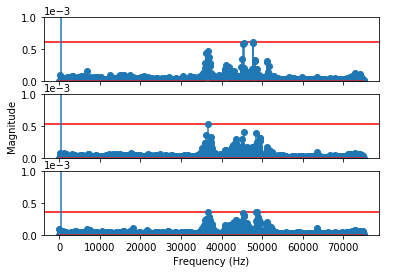

In [51]:
fig, ax = plt.subplots(3,1, sharex=True)

for i, axi in enumerate(ax):
    axi.set_ylim([0,0.001])
    axi.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    axi.axhline(y=second_max[i], color='r')
    
ax[0].stem(dt_f_arr_1[300], dt_fft_1[300])
#ax[0].ticklabel_format(style='sci')

ax[1].stem(dt_f_arr_2[300], dt_fft_2[300])
ax[2].stem(dt_f_arr_3[300], dt_fft_3[300])

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', 
                bottom='off', left='off', right='off')
plt.xlabel("Frequency (Hz)")
plt.ylabel('Magnitude');
#plt.title("Magnitude spectrum for increasing integration Time")

In [52]:
save_figure('period_effect.png', fig)

#### FFT of 

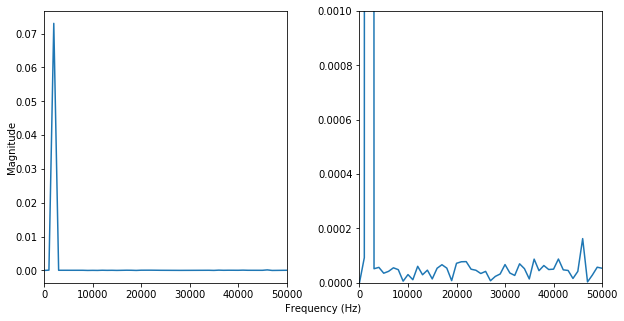

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.subplots_adjust(hspace=0.05, wspace=0.3)
ax[0].set_xlim([0,50000])
ax[0].plot(dt_f_arr_1[2000], dt_fft_1[300])
# ax[0].set_xlabel("Frequency (Hz)")
# ax[0].set_ylabel('Magnitude');

ax[1].plot(dt_f_arr_1[2000], dt_fft_1[300])
ax[1].set_ylim([0,0.001])
ax[1].set_xlim([0,50000])
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', 
                bottom='off', left='off', right='off')
plt.xlabel("Frequency (Hz)")
plt.ylabel('Magnitude');

In [54]:
save_figure('freq_spec.png', fig)

### Comparing with Standard FRA with equivalent circuit
I compare a randle's equivalent result from a standard FRA with that of the active load

A few things to note:
- Readings include:
    - FRA with the Randles
    - FRA with the battery
    - active load with just power supply
    - active load with randles
    - active load with battery
* Some compensation may be necessary due to effect from the power supply

In [55]:
dt_FRA_rand = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/Autolab/randles_2.txt')

# a bit of cleaning
del_col = [0, 6, 7, 8]  # remove columns
del_col_name = dt_FRA_rand.columns[del_col]
dt_FRA_rand.drop(del_col_name, axis=1, inplace=True)
dt_FRA_rand.head()

,Frequency (Hz),Z' (Ω),-Z'' (Ω),Z (Ω),-Phase (°)
0,20000.0,1.196138,0.154326,1.206053,7.351686
1,11184.0,1.220220,0.259942,1.247600,12.025890
2,6254.2,1.265681,0.438617,1.339527,19.113556
3,3497.4,1.371348,0.734979,1.555889,28.189235
4,1955.7,1.644698,1.191420,2.030890,35.919598


In [56]:
# data from active load
imp_dt_names = ['freq', 'z_mag', 'z_ph', 'z_re', 'z_im']
dt_Load_rand = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/Equiv_circuit/03-Nov-2017 15-16-30-0.07-6.csv',
                          names=imp_dt_names)
dt_Load_rand.sort_values(by='freq', ascending=False, inplace=True)
dt_Load_rand.head()


,freq,z_mag,z_ph,z_re,z_im
17,20000.0,2.7302,185.66,2.7169,-0.269420
16,15000.0,2.7662,180.94,2.7659,-0.045294
15,10000.0,2.8443,174.22,2.8299,0.286640
14,7000.0,2.9462,168.04,2.8823,0.610460
13,6000.0,3.0184,165.21,2.9184,0.770430


__some compensation for `dt_Load_rand`__

In [57]:
dt_Load_rand['z_re_comp'] = dt_Load_rand['z_re']/2-0.2
dt_Load_rand['z_im_comp'] = dt_Load_rand['z_im']/2+0.05
dt_Load_rand.head()

,freq,z_mag,z_ph,z_re,z_im,z_re_comp,z_im_comp
17,20000.0,2.7302,185.66,2.7169,-0.269420,1.15845,-0.084710
16,15000.0,2.7662,180.94,2.7659,-0.045294,1.18295,0.027353
15,10000.0,2.8443,174.22,2.8299,0.286640,1.21495,0.193320
14,7000.0,2.9462,168.04,2.8823,0.610460,1.24115,0.355230
13,6000.0,3.0184,165.21,2.9184,0.770430,1.25920,0.435215


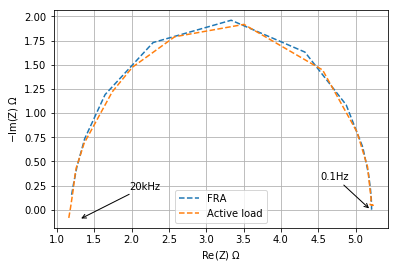

In [58]:
# plotting
from scipy import interpolate

fig, ax = plt.subplots()

x_FRA = dt_FRA_rand.iloc[:, 1]
y_FRA = dt_FRA_rand.iloc[:, 2]

x_load = dt_Load_rand['z_re_comp']
y_load = dt_Load_rand['z_im_comp']

# interpolation
# x_FRA_new = np.linspace(x_FRA.min(), x_FRA.max(), 20)
# y_FRA_new = interpolate.spline(x_FRA, y_FRA, x_FRA_new)

# x_load_new = np.linspace(x_load.min(), x_load.max(), 100)
# y_load_new = interpolate.spline(x_load, y_load, x_load_new, 3)
#y_new = interpolate.splev(x_new, tck, der=0)


ax.plot(dt_FRA_rand.iloc[:, 1], dt_FRA_rand.iloc[:, 2], '--', label='FRA')
ax.plot(dt_Load_rand['z_re_comp'], dt_Load_rand['z_im_comp'], '--', label='Active load')

# ax.plot(x_FRA_new, y_FRA_new, '-o', )
# ax.plot(x_load_new, y_load_new, '-o')
ax.set_xlabel('Re(Z) $\Omega$')
ax.set_ylabel('$\minus$Im(Z) $\Omega$')

# annotate
ax.annotate("20kHz", xy=(1.3, -0.1), xycoords='data',xytext=(50, 30), 
            textcoords='offset points', arrowprops=dict(arrowstyle="->") )

ax.annotate("0.1Hz", xy=(5.2, 0), xycoords='data',xytext=(-50, 30), 
            textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.legend()
plt.grid()

In [59]:
save_figure('equiv_cct_nyquist.png', fig)

### Other signals can be injected too

In [61]:
chirp_names = ['volt', 'curr']
dt_chirp = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/Matlab Code/eis/signals/03-Nov-2017 16-32-38-chirp.csv', 
                      names=chirp_names)
dt_chirp.head()

,volt,curr
0,8.0683,0.52779
1,8.0333,0.81281
2,8.0343,0.81500
3,8.0327,0.81312
4,8.0315,0.81500


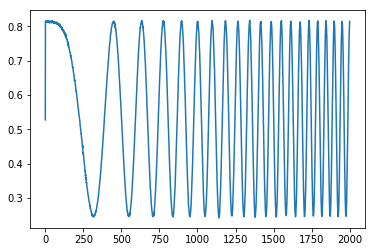

In [62]:
fig, ax = plt.subplots()
curr = dt_chirp['curr']

ax.plot(curr);

In [63]:
save_figure('chirp.png', fig)

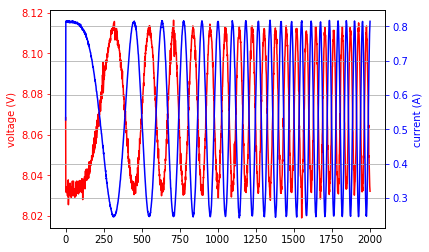

In [64]:
fig, ax = plt.subplots()
ax.plot(dt_chirp['volt'],'r-')
#ax.set_xlabel()
ax.set_ylabel('voltage (V)', color='r')
ax.tick_params('y', colors='r')

ax2 = ax.twinx()
ax2.plot(dt_chirp['curr'], 'b-')
ax2.set_ylabel('current (A)', color='b')
ax2.tick_params('y', colors='b')
plt.grid(True)

In [65]:
save_figure('chirp.png', fig)